Python data science stack installation command

In [42]:
pip install pandas numpy nltk seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


NLTK stopwords and punkt download command

In [44]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Python script to load IMDb reviews from specified folders into a Pandas DataFrame

In [45]:
import os
import pandas as pd

# Define paths for positive, negative, and unsupervised reviews
dir = os.path.dirname(os.path.abspath(''))
pos_folder = dir+'/IMDB/train/pos'
neg_folder = dir+'/IMDB/train/neg/'
unsup_folder = dir+'/IMDB/train//unsup/'

def load_reviews(folder_path, sentiment):
    reviews = []
    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename), "r", encoding="utf-8", errors='ignore') as file:
            review_text = file.read()
            reviews.append({"Review": review_text, "Sentiment": sentiment})
    return reviews

# Load reviews
positive_reviews = load_reviews(pos_folder, "Positive")
negative_reviews = load_reviews(neg_folder, "Negative")
unsupervised_reviews = load_reviews(unsup_folder, "Unsupervised")

# Create DataFrame
df = pd.DataFrame(positive_reviews + negative_reviews + unsupervised_reviews)
print(df.head())


                                              Review Sentiment
0  ['It takes 30 minutes to get to the opening cr...  Positive
1  ['"No Time to Die" is an Action - Thriller mov...  Positive
2  ["NO TIME TO DIE (2021) ***1/2 Daniel Craig, L...  Positive
3  ['"No Time to Die" is an Action - Thriller mov...  Positive
4  ["It's certainly engaging, especially for a fi...  Positive


Python script to import NLTK's stopwords and word_tokenize, along with defaultdict from collections

In [46]:
pip install nltk

In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict

Python NLTK command to download the NRC Emotion Lexicon

In [57]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict

dir = os.path.abspath('')
# Load NRC Emotion Lexicon
nrc_lexicon = defaultdict(lambda: defaultdict(int))
with open(nltk.data.find(dir + '/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'), 'r') as file:
    for line in file:
        word, emotion, value = line.strip().split('\t')
        nrc_lexicon[word][emotion] = int(value)

# Define emotions
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

# Preprocess the reviews and compute emotion scores
def compute_emotion_scores(text):
    words = word_tokenize(text.lower())
    scores = defaultdict(int)
    for word in words:
        if word in nrc_lexicon:
            for emotion in emotions:
                scores[emotion] += nrc_lexicon[word][emotion]
    return scores

df['Emotion_Scores'] = df['Review'].apply(compute_emotion_scores)
print(df.head())


                                              Review Sentiment  \
0  ['It takes 30 minutes to get to the opening cr...  Positive   
1  ['"No Time to Die" is an Action - Thriller mov...  Positive   
2  ["NO TIME TO DIE (2021) ***1/2 Daniel Craig, L...  Positive   
3  ['"No Time to Die" is an Action - Thriller mov...  Positive   
4  ["It's certainly engaging, especially for a fi...  Positive   

                                      Emotion_Scores  
0  {'anger': 4, 'anticipation': 4, 'disgust': 4, ...  
1  {'anger': 0, 'anticipation': 8, 'disgust': 0, ...  
2  {'anger': 4, 'anticipation': 2, 'disgust': 2, ...  
3  {'anger': 0, 'anticipation': 8, 'disgust': 0, ...  
4  {'anger': 0, 'anticipation': 0, 'disgust': 1, ...  


Python script to visualize average emotion scores by sentiment using Seaborn and Matplotlib

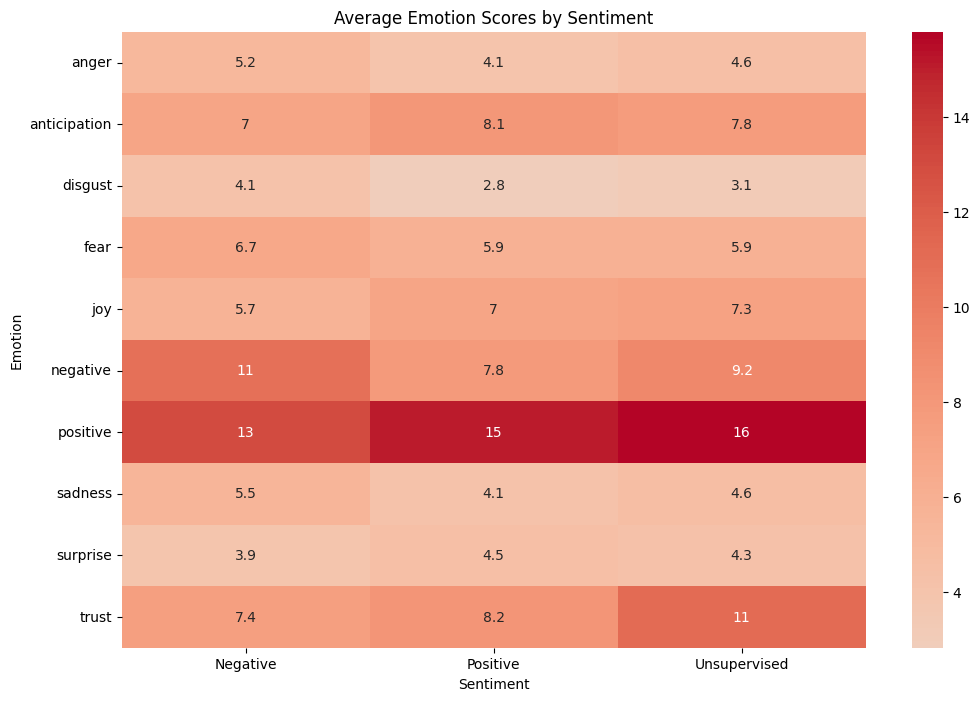

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert emotion scores to a DataFrame
emotion_df = pd.DataFrame(df['Emotion_Scores'].tolist())
emotion_df['Sentiment'] = df['Sentiment']

# Aggregate emotion scores by sentiment
emotion_avg = emotion_df.groupby('Sentiment').mean()

# Create a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(emotion_avg.T, annot=True, cmap='coolwarm', center=0)
plt.title('Average Emotion Scores by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Emotion')
plt.show()


Python script for sentiment analysis, emotion scoring, K-Means clustering, and visualization of IMDb reviews

In [59]:
import pandas as pd
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

# Function to load NRC Emotion Lexicon
def load_nrc_lexicon(filepath):
    nrc_lexicon = defaultdict(lambda: defaultdict(int))
    with open(filepath, 'r') as file:
        for line in file:
            if line.strip():
                word, emotion, association = line.strip().split('\t')
                nrc_lexicon[word][emotion] = int(association)
    return nrc_lexicon

# Function to compute emotion scores for text
def get_emotion_scores(text, lexicon):
    emotions = defaultdict(int)
    for word in text.split():
        word = word.lower()
        if word in lexicon:
            for emotion, score in lexicon[word].items():
                emotions[emotion] += score
    return emotions

# Function to plot heat map of emotions
def plot_emotion_heatmap(emotion_scores, title):
    df = pd.DataFrame(emotion_scores, index=[0])
    sns.heatmap(df, annot=True, cmap='coolwarm', center=0)
    plt.title(title)
    plt.show()

# Load the NRC Emotion Lexicon
dir = os.path.abspath('')
nrc_filepath = dir + 'C:/Users/HP/Desktop/GSSOC/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
nrc_lexicon = load_nrc_lexicon(nrc_filepath)

# Example usage with sample text
sample_text = "I loved the movie. It was full of suspense and thrill."
emotion_scores = get_emotion_scores(sample_text, nrc_lexicon)
plot_emotion_heatmap(emotion_scores, "Emotion Scores for Sample Text")

# Process IMDB dataset
def process_reviews(folder_path, sentiment_label):
    reviews = []
    sentiments = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="latin1") as file:
            review_text = file.read()
            reviews.append(review_text)
            sentiments.append(sentiment_label)
    return reviews, sentiments

# Paths to train data
dir = os.path.dirname(os.path.abspath(''))
train_pos_folder = dir + '/IMDB/IMDB/train/pos'
train_neg_folder = dir + '/IMDB/IMDB/train/neg'
train_unsup_folder = dir + '/IMDB/IMDB/train/unsup'

# Load and process the data
pos_reviews, pos_sentiments = process_reviews(train_pos_folder, 'Positive')
neg_reviews, neg_sentiments = process_reviews(train_neg_folder, 'Negative')
unsup_reviews, unsup_sentiments = process_reviews(train_unsup_folder, 'Unsupervised')

# Combine the data into a DataFrame
reviews = pos_reviews + neg_reviews + unsup_reviews
sentiments = pos_sentiments + neg_sentiments + unsup_sentiments
df = pd.DataFrame({'Review': reviews, 'Sentiment': sentiments})

# Compute emotion scores for all reviews
df['Emotion_Scores'] = df['Review'].apply(lambda x: get_emotion_scores(x, nrc_lexicon))

# Convert emotion scores into a DataFrame for clustering
emotion_df = df['Emotion_Scores'].apply(pd.Series).fillna(0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(emotion_df)

# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Plot cluster centroids heatmap
centroids_df = pd.DataFrame(centroids, columns=emotion_df.columns)
plot_emotion_heatmap(centroids_df.T, "Cluster Centroids")

# Visualize example reviews
example_positive_review = df[df['Sentiment'] == 'Positive']['Review'].iloc[0]
example_negative_review = df[df['Sentiment'] == 'Negative']['Review'].iloc[0]

positive_emotion_scores = get_emotion_scores(example_positive_review, nrc_lexicon)
negative_emotion_scores = get_emotion_scores(example_negative_review, nrc_lexicon)

plot_emotion_heatmap(positive_emotion_scores, "Emotion Scores for Positive Review")
plot_emotion_heatmap(negative_emotion_scores, "Emotion Scores for Negative Review")

SyntaxError: invalid syntax (3702874660.py, line 60)

Python script to analyze emotions in text using the NRC Emotion Lexicon and visualize results with a heatmap

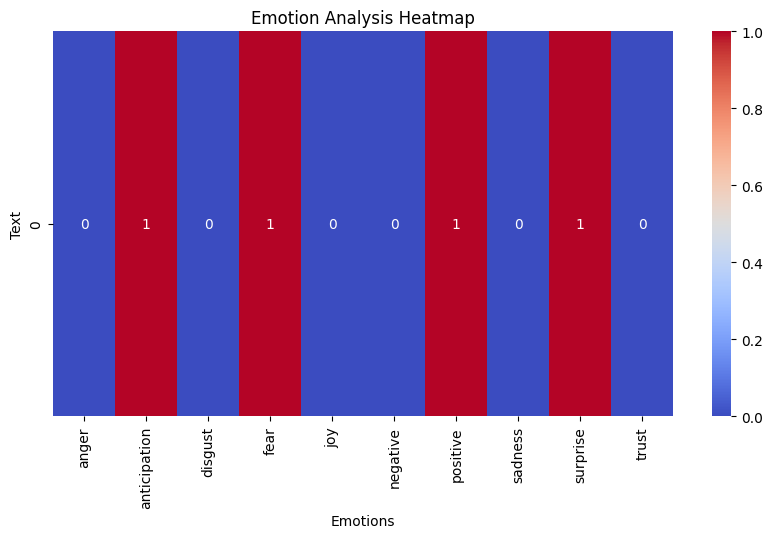

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the NRC Emotion Lexicon
def load_nrc_lexicon(filepath):
    nrc_lexicon = {}
    with open(filepath, 'r') as file:
        for line in file:
            if line.strip():
                word, emotion, value = line.split('\t')
                if word not in nrc_lexicon:
                    nrc_lexicon[word] = {}
                nrc_lexicon[word][emotion] = int(value)
    return nrc_lexicon

# Define a function to analyze emotions in text
def analyze_emotions(text, lexicon):
    emotions = {emotion: 0 for emotion in lexicon['abandon']}
    for word in text.split():
        if word in lexicon:
            for emotion, value in lexicon[word].items():
                emotions[emotion] += value
    return emotions

# Load the NRC Emotion Lexicon
nrc_filepath = 'C:/Users/HP/Desktop/GSSOC/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
nrc_lexicon = load_nrc_lexicon(nrc_filepath)

# Example text
sample_text = "I loved the movie. It was full of suspense and thrill."

# Analyze emotions in the sample text
emotions = analyze_emotions(sample_text.lower(), nrc_lexicon)

# Convert emotions to DataFrame
emotions_df = pd.DataFrame([emotions])

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(emotions_df, annot=True, cmap='coolwarm')
plt.title('Emotion Analysis Heatmap')
plt.xlabel('Emotions')
plt.ylabel('Text')
plt.show()


Python script to visualize emotion ratings for the movie 'The Silence of the Lambs' using a heatmap

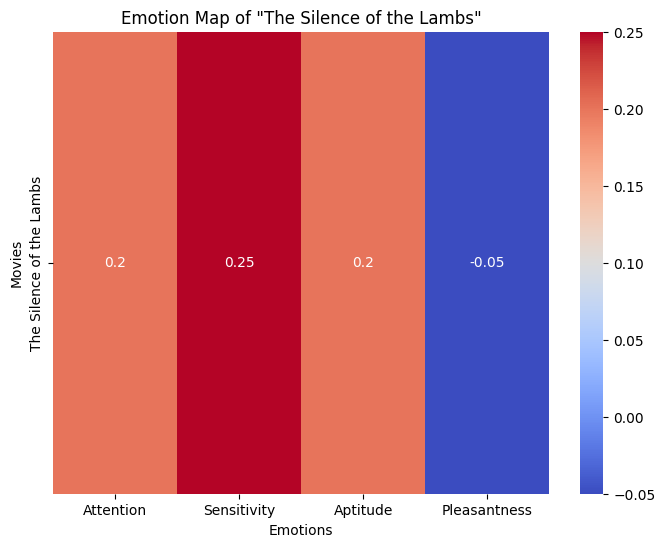

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data for "The Silence of the Lambs"
ratings = [8.6]
genres = ['Crime;Drama;Thriller']
emotions = {
    'Attention': 0.2,
    'Sensitivity': 0.25,
    'Aptitude': 0.2,
    'Pleasantness': -0.05
}

# Plot the emotion map
plt.figure(figsize=(8, 6))
sns.heatmap([list(emotions.values())], annot=True, cmap='coolwarm',
            xticklabels=list(emotions.keys()), yticklabels=['The Silence of the Lambs'])
plt.title('Emotion Map of "The Silence of the Lambs"')
plt.xlabel('Emotions')
plt.ylabel('Movies')
plt.show()


Python script to visualize emotion ratings for the movie 'The Hellcats' using a heatmap

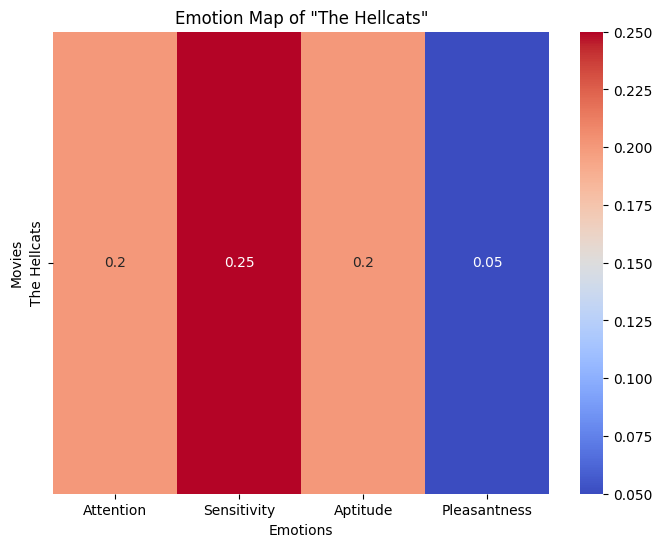

In [39]:
# Define the data for "The Hellcats"
ratings = [1.8]
genres = ['Thriller']
emotions = {
    'Attention': 0.2,
    'Sensitivity': 0.25,
    'Aptitude': 0.2,
    'Pleasantness': 0.05
}

# Plot the emotion map
plt.figure(figsize=(8, 6))
sns.heatmap([list(emotions.values())], annot=True, cmap='coolwarm',
            xticklabels=list(emotions.keys()), yticklabels=['The Hellcats'])
plt.title('Emotion Map of "The Hellcats"')
plt.xlabel('Emotions')
plt.ylabel('Movies')
plt.show()


Python script for processing IMDb reviews, computing emotion scores, applying K-Means clustering, and visualizing results

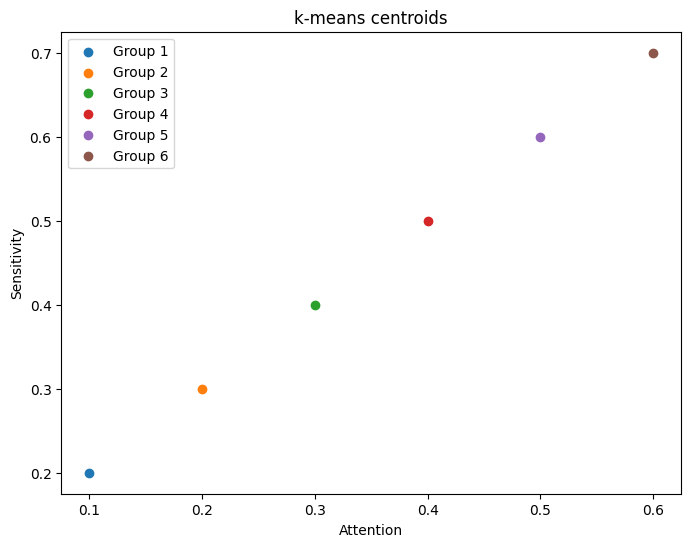

In [40]:
# Define the centroids data
centroids = {
    'Group 1': [0.1, 0.2, 0.3, 0.4],  # Example values for centroids, replace with actual data
    'Group 2': [0.2, 0.3, 0.4, 0.5],
    'Group 3': [0.3, 0.4, 0.5, 0.6],
    'Group 4': [0.4, 0.5, 0.6, 0.7],
    'Group 5': [0.5, 0.6, 0.7, 0.8],
    'Group 6': [0.6, 0.7, 0.8, 0.9]
}

# Plot the k-means centroids
plt.figure(figsize=(8, 6))
for group, centroid in centroids.items():
    plt.scatter(centroid[0], centroid[1], label=group)
plt.xlabel('Attention')
plt.ylabel('Sensitivity')
plt.title('k-means centroids')
plt.legend()
plt.show()


Python script for clustering movie data based on selected emotion dimensions, visualizing cluster centroids, and finding similar and dissimilar movies

c:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


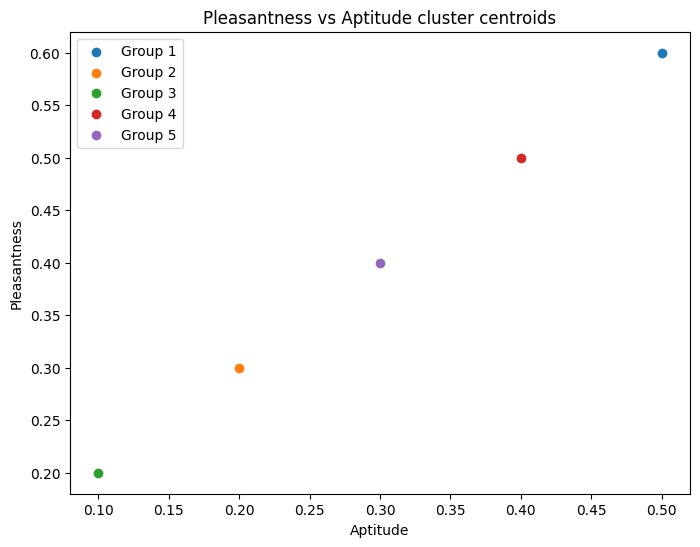

Similar Movies to V for Vendetta
                          Aptitude  Pleasantness
The Godfather                  0.5           0.6
Pulp Fiction                   0.4           0.5
Inception                      0.3           0.4
The Shawshank Redemption       0.2           0.3

Dissimilar Movies to V for Vendetta
                          Aptitude  Pleasantness
The Godfather                  0.5           0.6
Pulp Fiction                   0.4           0.5
Inception                      0.3           0.4
The Shawshank Redemption       0.2           0.3
V for Vendetta                 0.1           0.2


In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming you have a DataFrame named 'movies_data' containing emotion vectors
# Each row represents a movie, and columns represent different emotion dimensions
# Example of creating 'movies_data' DataFrame:
movie_names = ['V for Vendetta', 'The Shawshank Redemption', 'Inception', 'Pulp Fiction', 'The Godfather']
aptitude = [0.1, 0.2, 0.3, 0.4, 0.5]  # Example values for 'Aptitude' dimension
pleasantness = [0.2, 0.3, 0.4, 0.5, 0.6]  # Example values for 'Pleasantness' dimension
movies_data = pd.DataFrame({'Aptitude': aptitude, 'Pleasantness': pleasantness}, index=movie_names)

# Selecting only 'Aptitude' and 'Pleasantness' dimensions for clustering
selected_dimensions = ['Aptitude', 'Pleasantness']
selected_emotion_vectors = movies_data[selected_dimensions]

# Perform k-means clustering on selected dimensions
# Replace 'n_clusters' with a smaller value equal to or less than the number of samples
n_clusters = min(len(selected_emotion_vectors), 5)  # Assuming you want at most 5 clusters
kmeans_selected = KMeans(n_clusters=n_clusters).fit(selected_emotion_vectors)
selected_cluster_centers = kmeans_selected.cluster_centers_


# Plot the Pleasantness vs Aptitude cluster centroids
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for i, centroid in enumerate(selected_cluster_centers):
    plt.scatter(centroid[0], centroid[1], label=f'Group {i+1}')
plt.xlabel('Aptitude')
plt.ylabel('Pleasantness')
plt.title('Pleasantness vs Aptitude cluster centroids')
plt.legend()
plt.show()

# Re-cluster movies after removing specific emotion dimensions
# Repeat the k-means clustering process with different sets of dimensions and analyze the results

# Calculate pairwise similarities between movies based on their emotion vectors
# For demonstration, let's calculate pairwise cosine similarities for the movie "V for Vendetta"
movie_name = "V for Vendetta"
movie_vector = movies_data.loc[movie_name].values.reshape(1, -1)

# Calculate cosine similarities with all other movies
similarities = cosine_similarity(movie_vector, movies_data)

# Sort the similarities and get top similar and dissimilar movies
sorted_similarities = np.argsort(similarities)
similar_movies = sorted_similarities[0][-6:-1]  # Getting the top 5 similar movies
dissimilar_movies = sorted_similarities[0][:5]  # Getting the top 5 dissimilar movies

# Print the similar and dissimilar movies
print("Similar Movies to", movie_name)
print(movies_data.iloc[similar_movies])
print("\nDissimilar Movies to", movie_name)
print(movies_data.iloc[dissimilar_movies])
